## Final Project Submission

Please fill out:
* Student name: Jerry Narkiso
* Student pace: full time
* Scheduled project review date/time: 22 March 2024
* Instructor name: Asha Deen
* Blog post URL: https://github.com/jerrynarkiso/dsc-phase-1-project-v2-4


# BLOCKBUSTER MOVIE SERVICE PROVIDER


1. **Introduction**
  

The blockbuster movie service provider would aim to revolutionize the way people access and enjoy blockbuster movies. We're entering the market as a comprehensive movie service provider, offering a wide array of the latest and greatest films through an innovative platform that prioritizes user experience and convenience. Our strategy encompasses digital streaming, physical media rentals, and exclusive partnerships to ensure that our customers have unparalleled access to the best cinematic experiences.


**Business Understanding**

Market Analysis:The entertainment industry, particularly the movie sector, has seen significant shifts in recent years. With the rise of streaming platforms, there's been a growing demand for convenient, on-demand access to blockbuster films.
    
Customer Segmentation: Our target market includes movie enthusiasts of all ages who seek quality content and value convenience. This includes individuals who prefer streaming services, as well as those who still appreciate the experience of physical media.
    
Competitive Landscape: While there are several established streaming platforms in the market, there's still room for innovation and differentiation. By offering a hybrid model that combines streaming with physical rentals, we aim to carve out a unique position in the market.
    
Industry Trends: The trend towards digital streaming is undeniable, but there's also a nostalgia-driven resurgence in physical media, particularly among collectors and cinephiles. We intend to leverage these trends to offer a comprehensive solution that caters to diverse preferences.

1.2. **Mission Statement**

Our mission is to provide unparalleled access to blockbuster movies through a seamless and personalized entertainment experience. We're dedicated to delivering quality content, innovative technology, and exceptional service to our customers, enriching their lives through the magic of cinema.

1.3. **Vision Statement**

Our vision is to become the premier destination for movie lovers everywhere, recognized for our diverse selection, user-friendly platform, and commitment to innovation. We aspire to be the go-to source for blockbuster entertainment, setting new standards for excellence in the industry.

1.4. **Key Objectives**

  - Build a comprehensive library of blockbuster movies, spanning various genres and decades.
  - Develop a user-friendly platform that offers seamless streaming and rental experiences
  - Forge strategic partnerships with studios, distributors, and content creators to secure exclusive titles and deals.
 - Implement robust marketing and promotional campaigns to raise awareness and attract customers. 
 
 - Continuously innovate and evolve our services to stay ahead of industry trends and customer preferences.

2 **Data Analysis**

2.1 **Importing libraries**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import os
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

2.2 **Number of tables in the dataset**

In [9]:
import pandas as pd

def show_tables_summary(csv_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Extract table names
    table_names = df.columns
    
    # Display total number of tables
    total_tables = len(table_names)
    print(f"Total tables in the BoM Movie dataset: {total_tables}")
    
    # Display table names
    print("\nTable Names:")
    for i, table_name in enumerate(table_names, 1):
        print(f"{i}. {table_name}")

# Example usage
csv_file = "bom.movie_gross.csv" 
show_tables_summary(csv_file)


Total tables in the BoM Movie dataset: 5

Table Names:
1. title
2. studio
3. domestic_gross
4. foreign_gross
5. year


2.3 **Total Movie Titles in the dataset**

In [16]:


def total_movie_titles(csv_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Find the column containing movie titles
    title_columns = [col for col in df.columns if 'title' in col.lower()]
    
    if not title_columns:
        raise ValueError("No column containing movie titles found.")
    
    # Assuming the first title column found contains the movie titles
    title_column = title_columns[0]
    
    # Count unique movie titles in the selected column
    total_titles = len(df[title_column].unique())
    
    return total_titles

csv_file = "bom.movie_gross.csv"  
total_titles = total_movie_titles(csv_file)
print(f"Total number of movie titles in the dataset: {total_titles}")

Total number of movie titles in the dataset: 3386


2.4 **Movies with the highest domestic grosss** 

In [17]:


def movies_highest_domestic_gross(csv_file, top_n=10):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Sort the DataFrame by 'domestic_gross' column in descending order
    sorted_df = df.sort_values(by='domestic_gross', ascending=False)
    
    # Display the top movies with highest domestic gross
    top_movies = sorted_df.head(top_n)
    
    return top_movies

# Example usage
csv_file = "bom.movie_gross.csv"  # Replace with the path to your CSV file
top_movies = movies_highest_domestic_gross(csv_file)

# Display the top movies
print("Top Movies with Highest Domestic Gross:")
print(top_movies[['title', 'domestic_gross']])


Top Movies with Highest Domestic Gross:
                             title  domestic_gross
1872  Star Wars: The Force Awakens     936700000.0
3080                 Black Panther     700100000.0
3079        Avengers: Infinity War     678800000.0
1873                Jurassic World     652300000.0
727          Marvel's The Avengers     623400000.0
2758      Star Wars: The Last Jedi     620200000.0
3082                 Incredibles 2     608600000.0
2323  Rogue One: A Star Wars Story     532200000.0
2759   Beauty and the Beast (2017)     504000000.0
2324                  Finding Dory     486300000.0


2.5 **Movies with the highest foreign gross**

In [19]:
def movies_highest_foreign_gross(csv_file, top_n=10):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Sort the DataFrame by 'foreign_gross' column in descending order
    sorted_df = df.sort_values(by='foreign_gross', ascending=False)
    
    # Display the top movies with highest foreign gross
    top_movies = sorted_df.head(top_n)
    
    return top_movies

# Example usage
csv_file = "bom.movie_gross.csv"  # Replace with the path to your CSV file
top_foreign_movies = movies_highest_foreign_gross(csv_file)

# Display the top movies
print("Top Movies with Highest Foreign Gross:")
print(top_foreign_movies[['title', 'foreign_gross']])

Top Movies with Highest Foreign Gross:
                                           title foreign_gross
1805                             Life's a Breeze         99700
1331                                    The East         99700
302                                   White Lion         99600
2906                            A United Kingdom       9900000
510                                     Le Havre       9900000
1546                          Heaven is for Real       9900000
155   Sea Rex 3D: Journey to a Prehistoric World       9900000
3225                                The Bookshop       9900000
1291                           Only God Forgives       9900000
3181                           Holmes and Watson       9900000


2.6 **Most Common Studio in the dataset**

In [20]:
def most_common_studio(csv_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Count occurrences of each studio
    studio_counts = df['studio'].value_counts()
    
    # Select the studio with the highest count
    most_common_studio = studio_counts.idxmax()
    count = studio_counts.max()
    
    return most_common_studio, count

# Example usage
csv_file = "bom.movie_gross.csv"  # Replace with the path to your CSV file
most_common, count = most_common_studio(csv_file)

# Display the most common studio
print(f"The most common studio is '{most_common}' with a count of {count} movies.")

The most common studio is 'IFC' with a count of 166 movies.


3 **Summary**

The data obtained from the queries above can be instrumental in various aspects of the blockbuster movie service provider business:

Content Acquisition and Licensing: Knowing which movies have the highest domestic and foreign gross can guide your decisions when acquiring content licenses. Prioritizing movies with proven commercial success increases the likelihood of attracting viewers to your platform and generating revenue through subscriptions or rentals.

Content Curation: Understanding the most common studios can help you curate a diverse and appealing catalog of movies. By focusing on studios that consistently produce popular films, you can ensure a steady stream of high-quality content that resonates with your target audience.

User Engagement and Retention: Featuring top-performing movies prominently on your platform can enhance user engagement and retention. Users are more likely to spend time on your platform and return for future viewing sessions if they can access popular and highly-rated movies easily.

Personalized Recommendations: Analyzing data on movie performance and studio popularity allows you to develop algorithms for personalized movie recommendations. By understanding users' preferences based on their interactions with content, you can offer tailored recommendations that improve user satisfaction and drive engagement.

Marketing and Promotion: Leveraging data on popular movies and studios in your marketing campaigns can help attract new users to your platform. Highlighting blockbuster hits and exclusive partnerships with top studios can differentiate your service from competitors and entice potential subscribers.

Business Strategy and Partnerships: Insights into movie performance and studio preferences can inform your overall business strategy and partnerships. For example, you may choose to invest resources in securing exclusive deals with popular studios or prioritize marketing efforts around upcoming blockbuster releases.

Platform Development: Understanding user preferences and content consumption patterns can inform the development of new features and functionalities for your platform. For instance, you may introduce curated collections based on popular movie genres or implement advanced search capabilities to enhance the user experience.

##  MOVIE THEATER ESTABLISHMENT WHICH SCREENS BASED ON POPULARITY


1. **Introduction**
  

The business is centered around the concept of curating our movie screenings based on the current popularity and buzz surrounding each film. Unlike traditional theaters that follow rigid schedules or programming calendars, we will continuously adapt our movie lineup to reflect the ever-changing tastes and preferences of our audience.

1.2) **Mission Statement**

The mission at the movie theater is to create a dynamic and immersive moviegoing experience that transcends traditional cinema. We are dedicated to curating a selection of films based on current popularity, ensuring that our audience enjoys the latest and most buzz-worthy movies in a vibrant and communal atmosphere. By fostering a sense of excitement, connection, and discovery, we aim to ignite passion for cinema and create lasting memories for our patrons. Through innovation, exceptional service, and a commitment to excellence, we strive to be the ultimate destination for unparalleled cinematic entertainment.

1.3) **Vision**

Our vision is to redefine the movie theater industry by pioneering a new standard of popularity-driven screenings that cater to the dynamic tastes and preferences of our audience. We aspire to create a vibrant and inclusive space where movie enthusiasts can come together to discover, celebrate, and share their love for cinema. By staying at the forefront of industry trends and embracing innovation, we aim to set new benchmarks for excellence and inspire the future of cinematic entertainment.

1.4) **Key Objectives**


1. **Curate Popular Movie Selection:** Continuously monitor and adapt our movie lineup to showcase the latest and most buzz-worthy films, ensuring that our offerings align with current trends and audience interests.

2. **Enhance Customer Experience:** Create a welcoming and immersive environment that enhances the moviegoing experience for our patrons through comfortable seating, state-of-the-art technology, and exceptional customer service.

3. **Drive Audience Engagement:** Implement marketing strategies to promote our popularity-driven screenings, build anticipation around upcoming releases, and encourage active participation and interaction with our brand both online and offline.

4. **Optimize Revenue Streams:** Maximize revenue opportunities by effectively managing ticket sales, concession stand offerings, and potential partnerships with movie studios and distributors. Explore additional revenue streams such as special events, private screenings, and premium experiences.

5. **Foster Community Engagement:** Cultivate a sense of community among movie enthusiasts by hosting events, screenings, and discussions that encourage interaction, collaboration, and shared experiences among our audience.

6. **Stay Ahead of Industry Trends:** Stay informed and adapt to emerging industry trends, technological advancements, and changing consumer preferences to remain competitive and innovative in the evolving entertainment landscape.

7. **Ensure Operational Efficiency:** Streamline operational processes, optimize resource allocation, and maintain high standards of quality and cleanliness to deliver a seamless and enjoyable moviegoing experience for our patrons.

8. **Build Brand Reputation:** Establish [Business Name] as a trusted and respected brand known for its commitment to excellence, innovation, and customer satisfaction. Cultivate positive word-of-mouth, reviews, and testimonials to strengthen our brand reputation and credibility in the market.

9. **Sustain Growth and Expansion:** Evaluate opportunities for growth and expansion into new markets or additional locations, while maintaining a focus on sustainability, profitability, and long-term success.

10. **Promote Diversity and Inclusion:** Embrace diversity and inclusion in all aspects of our business operations, from our movie selection to our staff hiring and customer engagement initiatives, ensuring that everyone feels welcome and represented in our cinema community.

1.5) **Target Audience**

The target audience includes movie enthusiasts of all ages who crave a vibrant and dynamic moviegoing experience. Whether they're avid fans of mainstream blockbusters or indie darlings, our theater will cater to a diverse range of tastes and preferences. We also aim to attract families, couples, and groups looking for a fun and memorable outing.



1.6) **Revenue Model**

The revenue will primarily come from ticket sales, concession stand purchases, and potential partnerships with movie studios and distributors. Additionally, we may explore opportunities for special events, private screenings, and premium experiences to enhance our revenue streams and drive profitability.

## 2) Data Analysis

2.1) **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import os
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

2.2) **Total tables in the dataset**

In [2]:


def show_tables_summary(csv_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Extract table names
    table_names = df.columns
    
    # Display total number of tables
    total_tables = len(table_names)
    print(f"Total tables in the TMDB Movie dataset: {total_tables}")
    
    # Display table names
    print("\nTable Names:")
    for i, table_name in enumerate(table_names, 1):
        print(f"{i}. {table_name}")

# Example usage
csv_file = "tmdb.movies.csv" 
show_tables_summary(csv_file)


Total tables in the TMDB Movie dataset: 10

Table Names:
1. Unnamed: 0
2. genre_ids
3. id
4. original_language
5. original_title
6. popularity
7. release_date
8. title
9. vote_average
10. vote_count


2.3) **Total Movie Titles in the dataset**

In [3]:


def total_movie_titles(csv_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Find the column containing movie titles
    title_columns = [col for col in df.columns if 'title' in col.lower()]
    
    if not title_columns:
        raise ValueError("No column containing movie titles found.")
    
    # Assuming the first title column found contains the movie titles
    title_column = title_columns[0]
    
    # Count unique movie titles in the selected column
    total_titles = len(df[title_column].unique())
    
    return total_titles

csv_file = "tmdb.movies.csv"  
total_titles = total_movie_titles(csv_file)
print(f"Total number of movie titles in the dataset: {total_titles}")

Total number of movie titles in the dataset: 24835


2.4) **Graph of vote average vs vote count**

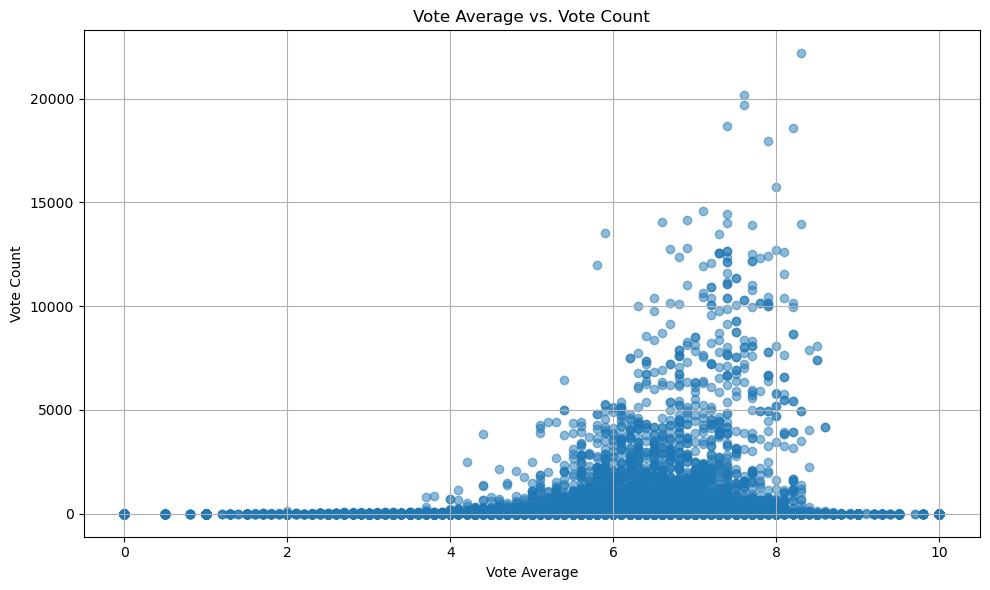

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv("tmdb.movies.csv")

# Plot vote_average against vote_count
plt.figure(figsize=(10, 6))
plt.scatter(df['vote_average'], df['vote_count'], alpha=0.5)
plt.title('Vote Average vs. Vote Count')
plt.xlabel('Vote Average')
plt.ylabel('Vote Count')
plt.grid(True)
plt.tight_layout()
plt.show()


2.5) **Top 30 movies according to popularity**

In [5]:


# Load the CSV file into a DataFrame
df = pd.read_csv("tmdb.movies.csv")

# Sort the DataFrame by 'popularity' column in descending order
sorted_df = df.sort_values(by='popularity', ascending=False)

# Print original_titles with the highest popularity
top_popular_movies = sorted_df[['original_title', 'popularity']].head(30)  # Adjust the number of entries to display as needed
print("Original Titles with the Highest Popularity:")
print(top_popular_movies)


Original Titles with the Highest Popularity:
                                    original_title  popularity
23811                       Avengers: Infinity War      80.773
11019                                    John Wick      78.123
23812            Spider-Man: Into the Spider-Verse      60.534
11020    The Hobbit: The Battle of the Five Armies      53.783
5179                                  The Avengers      50.289
11021                      Guardians of the Galaxy      49.606
20617                            Blade Runner 2049      48.571
23813                            Blade Runner 2049      48.571
23814  Fantastic Beasts: The Crimes of Grindelwald      48.508
23815                    Ralph Breaks the Internet      48.057
20618                       Spider-Man: Homecoming      46.775
20619                         John Wick: Chapter 2      45.253
20620                                        Logan      45.000
23816                         Ant-Man and the Wasp      44.729
14169     

## ADVERTISING CORPORATION FOR MOVIES BASED ON MOVIE BUDGET


1. **Introduction**
  

In the fast-paced and ever-evolving landscape of the entertainment industry, effective marketing and advertising strategies play a pivotal role in the success of movies. As the bridge between filmmakers and audiences, Movie Advertising Corporation (MAC) emerges as a dynamic and innovative partner, dedicated to revolutionizing the way movies are promoted and positioned in the market.

1.1) **Business Concept**

At Movie Advertising Corporation, we specialize in crafting tailored advertising solutions that leverage the unique attributes of each film to captivate audiences and drive box office success. The approach is rooted in data-driven insights, creative excellence, and strategic partnerships, ensuring that every marketing campaign is meticulously designed to maximize impact and reach

1.2) **Mission Statement**

The mission is to revolutionize the advertising landscape for movies by leveraging data-driven strategies and innovative approaches to maximize the impact of every marketing campaign. We are committed to empowering filmmakers and studios to reach their target audiences effectively while delivering unparalleled value and ROI. Through our dedication to creativity, integrity, and excellence, we aim to be the trusted partner of choice for movie advertising, driving success and growth for our clients in an ever-evolving entertainment industry.

1.3) **Vision**

The vision at The Movie Advertising Corporation is to redefine the way movies are marketed and promoted, setting new standards of effectiveness, efficiency, and creativity in the advertising industry. We envision a future where every movie campaign is tailored with precision, leveraging cutting-edge technologies and insights to captivate audiences and drive box office success. By fostering innovation, collaboration, and strategic thinking, we aspire to shape the future of movie advertising, empowering filmmakers to realize their visions and audiences to discover the magic of cinema in exciting new ways

1.4) **Key Objectives**

Market Research and Analysis: Conduct comprehensive market research to understand audience preferences, industry trends, and competitor strategies, enabling data-driven decision-making in advertising campaigns.

Budget Optimization: Develop cost-effective advertising strategies that maximize the impact of the allocated budget, optimizing spending across various advertising channels to achieve the highest ROI for filmmakers and studios.

Audience Targeting and Segmentation: Utilize advanced targeting techniques to identify and segment relevant audience groups based on demographics, interests, and behavior, tailoring advertising messages to resonate with specific audience segments effectively.

Creative Content Development: Collaborate with creative teams to produce compelling advertising content, including trailers, posters, and digital assets, that effectively communicates the unique selling points and emotional appeal of each movie.

Multi-Channel Advertising: Implement integrated advertising campaigns across multiple channels, including digital, social media, television, print, and outdoor, to maximize reach and engagement with diverse audience segments.

Performance Monitoring and Optimization: Monitor advertising performance in real-time, leveraging analytics and KPIs to assess campaign effectiveness and make data-driven optimizations to improve outcomes and achieve campaign objectives.

Brand Building and Reputation Management: Cultivate strong brand identities for movies through consistent messaging and branding initiatives, building positive perceptions and fostering audience loyalty and advocacy.

Strategic Partnerships and Collaborations: Establish strategic partnerships with media agencies, advertising platforms, influencers, and promotional partners to amplify advertising efforts, expand reach, and access new audience segments effectively.

Compliance and Regulatory Adherence: Ensure compliance with advertising regulations and industry standards, maintaining transparency, honesty, and ethical practices in all advertising activities to uphold trust and credibility with audiences.

Continuous Innovation and Adaptation: Embrace innovation and stay abreast of emerging advertising trends, technologies, and consumer behaviors, adapting advertising strategies and tactics accordingly to remain agile and competitive in the dynamic movie advertising landscape.

1.5) **Revenue Model**

Movie Advertising Corporation generates revenue through a variety of channels, including:

Advertising Services: Offering comprehensive advertising solutions, including digital marketing, social media campaigns, traditional media placement, influencer partnerships, and experiential activations.

Consulting Services: Providing strategic consulting services to filmmakers and studios, including market analysis, campaign planning, and audience targeting.

Partnership Opportunities: Securing partnerships with brands for product placement, promotional tie-ins, and sponsorship deals associated with movie releases.

Data Analytics: Offering data analytics and insights services to track campaign performance, measure audience engagement, and optimize advertising strategies for maximum impact.

## 2) Data Analysis

2.2) **Total tables in the dataset**

In [6]:


def show_tables_summary(csv_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Extract table names
    table_names = df.columns
    
    # Display total number of tables
    total_tables = len(table_names)
    print(f"Total tables in the TN Movie budget dataset: {total_tables}")
    
    # Display table names
    print("\nTable Names:")
    for i, table_name in enumerate(table_names, 1):
        print(f"{i}. {table_name}")

# Example usage
csv_file = "tn.movie_budgets.csv" 
show_tables_summary(csv_file)


Total tables in the TN Movie budget dataset: 6

Table Names:
1. id
2. release_date
3. movie
4. production_budget
5. domestic_gross
6. worldwide_gross


2.3) **Total Movie Titles in the dataset**

In [7]:


def total_movie_titles(csv_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Find the column containing movie titles
    title_columns = [col for col in df.columns if 'title' in col.lower()]
    
    if not title_columns:
        raise ValueError("No column containing movie titles found.")
    
    # Assuming the first title column found contains the movie titles
    title_column = title_columns[0]
    
    # Count unique movie titles in the selected column
    total_titles = len(df[title_column].unique())
    
    return total_titles

csv_file = "tmdb.movies.csv"  
total_titles = total_movie_titles(csv_file)
print(f"Total number of movie titles in the dataset: {total_titles}")

Total number of movie titles in the dataset: 24835


2.4) **Movies with the highest production budget**

In [8]:
# Load the CSV file into a DataFrame
df = pd.read_csv("tn.movie_budgets.csv")

# Convert 'production_budget' column to numeric
df['production_budget'] = pd.to_numeric(df['production_budget'].str.replace('$', '').str.replace(',', ''))

# Sort the DataFrame by 'production_budget' column in descending order and select top 10
top_10_highest_budgets = df.nlargest(10, 'production_budget')

# Display movies with the top 10 highest budgets
print("Movies with the Top 10 Highest Production Budgets:")
print(top_10_highest_budgets[['movie', 'production_budget']])


Movies with the Top 10 Highest Production Budgets:
                                         movie  production_budget
0                                       Avatar          425000000
1  Pirates of the Caribbean: On Stranger Tides          410600000
2                                 Dark Phoenix          350000000
3                      Avengers: Age of Ultron          330600000
4            Star Wars Ep. VIII: The Last Jedi          317000000
5         Star Wars Ep. VII: The Force Awakens          306000000
6                       Avengers: Infinity War          300000000
7   Pirates of the Caribbean: At Worldâs End          300000000
8                               Justice League          300000000
9                                      Spectre          300000000


2.5) **Top 50 movies according to worldwide gross**

In [9]:
df = pd.read_csv("tn.movie_budgets.csv")

# Sort the DataFrame by 'worldwide_gross' column in descending order and select top 30
top_30_movies = df.sort_values(by='worldwide_gross', ascending=False).head(30)

# Display top 30 movies according to worldwide gross
print("Top 50 Movies According to Worldwide Gross:")
print(top_30_movies[['movie', 'worldwide_gross']])

Top 50 Movies According to Worldwide Gross:
                               movie worldwide_gross
3737          Fifty Dead Men Walking        $997,921
3432                            Duma        $994,790
5062                       Insidious     $99,870,886
883                          Hellboy     $99,823,958
5613                         Mad Max     $99,750,000
1078                           Alpha     $99,624,873
1682                  Street Fighter     $99,423,000
1792                     Nacho Libre     $99,296,462
4373                     Desert Blue         $99,147
2343                          Hitman     $99,135,571
381        Where the Wild Things Are     $99,123,656
3247  Justin Bieber: Never Say Never     $99,034,125
591                         The Wild     $99,010,667
4358                   American Teen        $989,319
608                    The Lion King    $986,214,868
582                 The Time Machine     $98,983,590
3364                       Philomena     $98,963,392
10